In [1]:
import graphlab

A newer version of GraphLab Create (v2.0.1) is available! Your current version is v1.8.3.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [2]:
sales = graphlab.SFrame('ML Projects\Course 2\week6\kc_house_data_small.gl')

[INFO] GraphLab Create v1.8.3 started. Logging: C:\Users\hiambati\AppData\Local\Temp\graphlab_server_1468564547.log.0


In [3]:
(train_and_validation, test) = sales.random_split(.8, seed=1)
(train, validation) = train_and_validation.random_split(.8, seed=1)

In [4]:
import numpy as np

In [5]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1
    #features = ['sqft_living','bedrooms','bathrooms']
    features = ['constant']+features  #added constant to features 
    feature_sframe = data_sframe[features]  #Contains only the features column data
    features_matrix = feature_sframe.to_numpy()  #converting it into array using numpy
    output_sarray = data_sframe['price'] #here price is the output
    output_array = output_sarray.to_numpy() #conveting to numpy array
    return(features_matrix,output_array)

In [6]:
def normalize_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix,axis=0)
    return (feature_matrix/norms,norms)

In [7]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']
output = 'price'
feature_matrix_train,output_array_train =get_numpy_data(train,feature_list,output)
feature_matrix_valid,output_array_valid =get_numpy_data(validation,feature_list,output)
feature_matrix_test,output_array_test =get_numpy_data(test,feature_list,output)

In [8]:
features_train, norms = normalize_features(feature_matrix_train)
features_test = feature_matrix_test / norms
features_valid = feature_matrix_valid / norms

In [9]:
print features_test[0]
print features_train[9]

[ 0.01345102  0.01551285  0.01807473  0.01759212  0.00160518  0.017059    0.
  0.05102365  0.0116321   0.01564352  0.01362084  0.02481682  0.01350306
  0.          0.01345386 -0.01346927  0.01375926  0.0016225 ]
[ 0.01345102  0.01163464  0.00602491  0.0083488   0.00050756  0.01279425
  0.          0.          0.01938684  0.01390535  0.0096309   0.
  0.01302544  0.          0.01346821 -0.01346254  0.01195898  0.00156612]


In [10]:
def distance(data1,data2):
    data = data1-data2
    data = data**2
    data = np.sum(data)
    data = np.sqrt(data)
    return data

In [11]:
print distance(features_test[0],features_train[9])

0.0597235937167


In [12]:
i =1
distances = []
distances.insert(0,1000)
for data  in features_train[0:10]:
    distances.insert(i,distance(features_test[0],data))
    print "for house ",i," distance : ",distance(features_test[0],data)
    i = i+1

for house  1  distance :  0.060274709173
for house  2  distance :  0.0854688114883
for house  3  distance :  0.0614994643712
for house  4  distance :  0.0534027397882
for house  5  distance :  0.0584448406394
for house  6  distance :  0.0598792151018
for house  7  distance :  0.0546314049726
for house  8  distance :  0.0554310832416
for house  9  distance :  0.052383627841
for house  10  distance :  0.0597235937167


In [13]:
print min(distances)
print distances.index(min(distances))

0.052383627841
9


In [14]:
for i in xrange(3):
    print features_train[i]-features_test[0]
    # should print 3 vectors of length 18

[  0.00000000e+00  -3.87821276e-03  -1.20498190e-02  -1.05552733e-02
   2.08673616e-04  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -3.47633726e-03  -5.50336860e-03  -2.48168183e-02
  -1.63756198e-04   0.00000000e+00  -1.70072004e-05   1.30577772e-05
  -5.14364795e-03   6.69281453e-04]
[  0.00000000e+00  -3.87821276e-03  -4.51868214e-03  -2.26610387e-03
   7.19763456e-04   0.00000000e+00   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -3.47633726e-03   1.30705004e-03  -1.45830788e-02
  -1.91048898e-04   6.65082271e-02   4.23240653e-05   6.22415897e-06
  -2.89330197e-03   1.47606982e-03]
[  0.00000000e+00  -7.75642553e-03  -1.20498190e-02  -1.30002801e-02
   1.60518166e-03  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -5.21450589e-03  -8.32384500e-03  -2.48168183e-02
  -3.13866046e-04   0.00000000e+00   4.71047219e-05   1.56530415e-05
   3.72914476e-03   1.64764925e-03]


In [15]:
print features_train[0:3] - features_test[0]

[[  0.00000000e+00  -3.87821276e-03  -1.20498190e-02  -1.05552733e-02
    2.08673616e-04  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -3.47633726e-03  -5.50336860e-03  -2.48168183e-02
   -1.63756198e-04   0.00000000e+00  -1.70072004e-05   1.30577772e-05
   -5.14364795e-03   6.69281453e-04]
 [  0.00000000e+00  -3.87821276e-03  -4.51868214e-03  -2.26610387e-03
    7.19763456e-04   0.00000000e+00   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -3.47633726e-03   1.30705004e-03  -1.45830788e-02
   -1.91048898e-04   6.65082271e-02   4.23240653e-05   6.22415897e-06
   -2.89330197e-03   1.47606982e-03]
 [  0.00000000e+00  -7.75642553e-03  -1.20498190e-02  -1.30002801e-02
    1.60518166e-03  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -5.21450589e-03  -8.32384500e-03  -2.48168183e-02
   -3.13866046e-04   0.00000000e+00   4.71047219e-05   1.56530415e-05
    3.72914476e-03   1.64764925e-03]]


In [16]:
# verify that vectorization works
results = features_train[0:3] - features_test[0]
print results[0] - (features_train[0]-features_test[0])
# should print all 0's if results[0] == (features_train[0]-features_test[0])
print results[1] - (features_train[1]-features_test[0])
# should print all 0's if results[1] == (features_train[1]-features_test[0])
print results[2] - (features_train[2]-features_test[0])
# should print all 0's if results[2] == (features_train[2]-features_test[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [17]:
diff = -features_test[0]+features_train[0:]

In [18]:
diff[-1].sum()

-0.093433960584180104

In [19]:
print np.sum(diff**2, axis=1)[15] # take sum of squares across each row, and print the 16th sum
print np.sum(diff[15]**2)

0.00330705902879
0.00330705902879


In [20]:
distances_all = np.sqrt(np.sum(diff**2,axis=1))

In [21]:
print distances_all[100]

0.0237082324496


In [22]:
def distance_from_query_to_all(feature_matrix,query):
    difference = query - feature_matrix[0:]
    return np.sqrt(np.sum(difference**2,axis=1))

In [23]:
distance2 = distance_from_query_to_all(features_train,features_test[2])
#len(distance2)
distance2

array([ 0.01954476,  0.06861035,  0.02165079, ...,  0.02433478,
        0.02622734,  0.02637942])

In [24]:
print min(distance2)
for i in xrange(len(distance2)):
    if(distance2[i]==min(distance2)):
        print i

0.00286049526751
382


In [25]:
train[382]['price']

249000L

In [26]:
def get_matrix(data,indexes):
    result = []
    for i in xrange(len(indexes)):
        result.insert(i,data[indexes[i]])
    return result

In [27]:
def k_nearest_neighbour(k,features_matrix,query):
    k_houses = features_matrix[0:k]  # selecting the first k houses as the nearest neighbours
    distance_k_houses = distance_from_query_to_all(k_houses,query) #array of distances of k nearest houses
    ##print "nearest distances matrix:",distance_k_houses
    sorted_distance_index=np.argsort(distance_k_houses)    #index - distance ,can also beused to find the house number
    #print "index of the sorted above matrix :",sorted_distance_index
    #Now sorting the matrix according to the values
    sorted_distance_value = get_matrix(distance_k_houses,sorted_distance_index)   # value - distance ascending order of distances
    ##print "sorted nearest values initial :",sorted_distance_value
    ##print "****************************"
    sorted_house =get_matrix(train[0:k],sorted_distance_index) #check train or features matrix
    for i in xrange(k,len(features_matrix)): #check k or k+1
        distance_i_to_q = distance(features_matrix[i],query)
        ##print "distance_i_to_q",distance_i_to_q
        ##print "sorted nearest values :",sorted_distance_value
        ##print "condition:",(distance_i_to_q < sorted_distance_value[k-1])
        if (distance_i_to_q < sorted_distance_value[k-1]):         
            #if distance of i <last value in sorted list then we find a value of j such that the i'th
            #distance falls between j-1 and j
            j=1
            found_j = 0
            while(j<k):
                if((sorted_distance_value[j-1]<distance_i_to_q) & (sorted_distance_value[j]>distance_i_to_q)):
                    ##print "front one : ",sorted_distance_value[j-1]
                    ##print "back_one : ",sorted_distance_value[j]
                    ##print j
                    found_j = j
                j = j+1
            sorted_house[found_j+1:k] =sorted_house[found_j:k-1]
            sorted_house[found_j] = train[i]
            sorted_distance_value[found_j+1:k] = sorted_distance_value[found_j:k-1]
            sorted_distance_value[found_j] = distance_i_to_q
            ##print "sorted house before entry :",sorted_distance_index
            sorted_distance_index[found_j+1:k] = sorted_distance_index[found_j:k-1]
            ##print "sorted house after entry :",sorted_distance_index
            sorted_distance_index[found_j] = i
            ##print "sorted house after insert :",sorted_distance_index
            ##print "--------------"
    return sorted_house,sorted_distance_index
            
    
    
    

In [28]:
house,index = k_nearest_neighbour(4,features_train,features_test[2])
print index

[ 382 1149 4087 3142]


In [29]:
def single_value(k,features_matrix,output,query):
    sorted_houses,house_indexes = k_nearest_neighbour(k,features_matrix,query)
    k_house_price=0
    for i in xrange(len(house_indexes)):
        k_house_price += output[house_indexes[i]]
        #print "house single average : ",k_house_price/k
    return k_house_price/k

In [30]:
single_value(4,features_train,train['price'],features_test[2])

413987L

In [31]:
def make_n_predictions(k,features_matrix,output,features_query):
    predictions = []
    for i in xrange(len(features_query)):
        predictions.insert(i,single_value(k,features_matrix,train['price'],features_query[i:i+1]))
    return predictions
        

In [44]:
n=10
predictions_n = make_n_predictions(10,features_train,train['price'],features_test[0:n])
predictions_n

[881300L,
 431860L,
 460595L,
 430200L,
 766750L,
 667420L,
 350032L,
 512800L,
 484000L,
 457235L]

In [45]:
print "Original : ",test[0:10]['price']
print " predicted : ",predictions_n[0:10]
print min(predictions_n)

Original :  [650000L, 485000L, 438000L, 535000L, 785000L, 975000L, 287000L, 355000L, 305000L, 518500L]
 predicted :  [881300L, 431860L, 460595L, 430200L, 766750L, 667420L, 350032L, 512800L, 484000L, 457235L]
350032


In [46]:
for i in range(10):
    print i
    value_prediction = single_value(10,features_train,train['price'],features_test[i])
    print value_prediction

0
881300
1
431860
2
460595
3
430200
4
766750
5
667420
6
350032
7
512800
8
484000
9
457235


In [34]:
def getsPriceList(data):
    arr =[]
    for i in xrange(len(data)):
        arr.append(data[i])
    return arr

In [35]:
#Choosing best value of k
print "hiii"
rss_min = []
price_list = getsPriceList(validation['price'])
print "started"
for k in range(1,16): #now a particular k is selected 
    predictions =0
    print "K:",k
    list_for_single_k = []
    for i in xrange(0,len(feature_matrix_valid)):#len(feature_matrix_valid)):
        #predicting for a particular k,the predicted values.
        predictions = single_value(k,features_train,train['price'],feature_matrix_valid[i])
        error = predictions - price_list[i]
        error = error**2
        list_for_single_k.insert(i,error)
    rss_min.insert(k-1,sum(list_for_single_k))
    print "sum",sum(list_for_single_k)
print rss_min

hiii
started
K: 1
sum 570768235779838
K: 2
sum 924881676842338
K: 3
sum 616048111574618
K: 4
sum 495719669804632
K: 5
sum 424644427829538
K: 6
sum 398209314837781
K: 7
sum 342333129183960
K: 8
sum 289514713709798
K: 9
sum 253424482136494
K: 10
sum 233195310638813
K: 11
sum 236136196287218
K: 12
sum 232809092470678
K: 13
sum 224935236427166
K: 14
sum 216658616699125
K: 15
sum 211412973135760
[570768235779838L, 924881676842338L, 616048111574618L, 495719669804632L, 424644427829538L, 398209314837781L, 342333129183960L, 289514713709798L, 253424482136494L, 233195310638813L, 236136196287218L, 232809092470678L, 224935236427166L, 216658616699125L, 211412973135760L]


In [36]:
min(rss_min)

211412973135760L

In [47]:
rss_min.index(min(rss_min))

14

In [40]:
rss_min.index(min(rss_min))

14

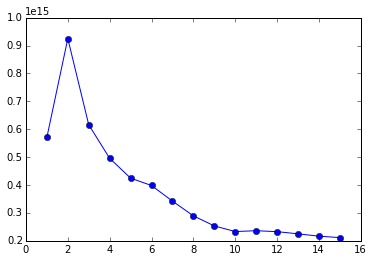

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

kvals = range(1, 16)
plt.plot(kvals, rss_min,'bo-')

In [49]:
rss_1 = 0
price_list1 = getsPriceList(test['price'])
for i in xrange(len(feature_matrix_test)):
    predictions_z = single_value(15,features_train,train['price'],feature_matrix_test[i])
    error = predictions_z - price_list1[i]
    error = error**2
    rss_1 = rss_1+error
    #print error
print rss_1


320353905432087
